# Order Parameter and exponent $\beta$

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import glob
import scipy.stats as stats

In [2]:
sns.set()

In [3]:
data_root = '../data/entropy-order-convolved/'
fig_root="../figures/"
# os.listdir(data_root)

In [4]:
M=6
m=10
classname="BA_NetworkPercolationExplosive_v7"
signature="{}_N_*_m_10_M_{}_entropy-order_*fast.txt".format(classname,M)

In [5]:
files=glob.glob(data_root + signature)

In [6]:
signature

'BA_NetworkPercolationExplosive_v7_N_*_m_10_M_6_entropy-order_*fast.txt'

In [7]:
files

['../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1000000_m_10_M_6_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1200000_m_10_M_6_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_800000_m_10_M_6_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_600000_m_10_M_6_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_400000_m_10_M_6_entropy-order_2019_avg.txt_convoluted_1times_fast.txt']

In [8]:
# create a file with exponent data on it and load it from there
# M=2
tc = 0.72775

### checking ensemble size

In [9]:
print("Ensemble sizes")
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        print("N=", head['N'], "  En=", head['En'])

Ensemble sizes
N= 1000000   En= 20000
N= 1200000   En= 20000
N= 800000   En= 20000
N= 600000   En= 20000
N= 400000   En= 20000


In [10]:
def find_specific_heat(t, H, N):
#     C = -t[1:]*np.diff(H)/np.diff(t)  # noisy data
    C = -t[1:]*np.diff(H)*N
#     print(1/np.diff(t)[0])
#     print(N)
    return C

def find_susceptibility(t, P, N):
    sus=np.diff(P)*N
    return sus

In [11]:
min_limit=0.97
max_limit=1.0

In [12]:
data=dict()
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        N=int(head['N'])
        M=int(head['M'])
        m=int(head['m'])
    X = np.loadtxt(file)
    t=X[:,0]
    index=(t > min_limit) & (t < max_limit)
    data[N] = X[index]
    

(11999, 3)
(17999, 3)
(23999, 3)
(29999, 3)
(35999, 3)


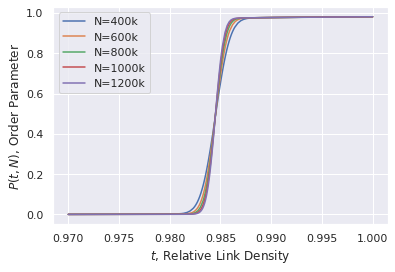

In [13]:
Ns = list(data.keys())
Ns.sort()
for N in Ns:
    print(data[N].shape)
    t, H, P = data[N].T
    plt.plot(t, P, label='N={}k'.format(N//1000))
    pass
plt.legend()
plt.xlabel(r"$t$, Relative Link Density")
plt.ylabel(r"$P(t, N)$, Order Parameter")

# plt.xlim([0.723, 0.734])
# plt.ylim([0, 0.5])
filename=fig_root + classname + "order-parameter_m{}_M{}".format(m, M)
# plt.savefig(filename)

## Finding $1/\nu$

(11999, 3)
(17999, 3)
(23999, 3)
(29999, 3)
(35999, 3)


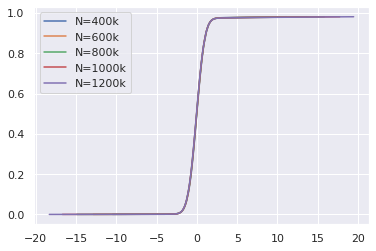

In [14]:

tc = 0.9845506554594833
one_by_nu=0.51

Ns = list(data.keys())
Ns.sort()
for N in Ns:
    print(data[N].shape)
    t, H, P = data[N].T
    x = (t-tc)*N**(one_by_nu)
    plt.plot(x, P, label='N={}k'.format(N//1000))
    pass
plt.legend()
# plt.xlabel(r"$t$, Relative Link Density")
# plt.ylabel(r"$P(t, N)$, Order Parameter")

# plt.xlim([-100, 100])
# plt.ylim([0, 0.5])
filename=fig_root + classname + "order-parameter_m{}_M{}".format(m, M)
# plt.savefig(filename)

### finding $1/\nu$

In [19]:
def find_x_deviation_v2(args):
    """
        h : height
        a : 0 -> low value
            1 -> high value
    """
    if len(args) < 4:
        print("4 argument is needed")
        return -1
    h, one_by_nu, gamma_by_nu, a = args
    if a > 1 or a < 0:
        print('invalid a')
        a = 0
    intersection_x = [] # x value at intersections
#     fig = plt.figure(figsize=(5,5), dpi=300)
    for N in data.keys():
        t, X = data[N]
        y = X*N**(-gamma_by_nu)
        y_h = np.ones(t.shape[0])*h
        t_prime = (t-tc)*N**(one_by_nu)
        idx = np.argwhere(np.diff(np.sign(y_h - y))).flatten()
        
#         plt.plot(t_prime, y, label='N={}'.format(N))
#         plt.plot(t_prime, y_h)
#         plt.plot(t_prime[idx], y_h[idx], 'o')
        
        intersection_x.append([N, t_prime[idx][a]])
        pass

#     plt.legend()
# #     plt.xlim(0.998, 0.999)
#     plt.xlim(-1,1)
#     plt.locator_params(nbins=5, axis='x')
#     plt.xlabel(r'$(t-t_c) N ^{1/\nu}$')
#     plt.ylabel(r'$\chi N^{-\gamma/\nu}$')
#     fig.text(0.2, 0.8, r"$\gamma/\nu={:.5f}$".format(gamma_by_nu))
    # plt.savefig('network_ba_explosive_M{}_susceptibility_collapse'.format(M))
    intersection_x = np.array(intersection_x)
    intersection_x[:,1] /= np.max(intersection_x[:,1])  # to normalize things
    return np.std(intersection_x[:,1])

In [15]:
h=0.05

[13296]
[16080]
[10523]
[7767]
[5037]


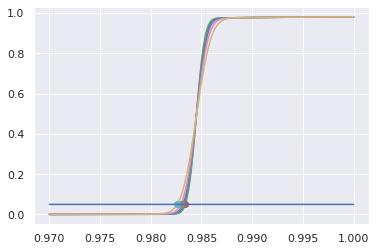

In [38]:
intersection_x = [] # x value at intersections
#     fig = plt.figure(figsize=(5,5), dpi=300)
for N in data.keys():
    t, H, P = data[N].T
    y = P
    y_h = np.ones(t.shape[0])*h
#     t_prime = (t-tc)*N**(one_by_nu)
    idx = np.argwhere(np.diff(np.sign(y_h - y))).flatten()
    
    print(idx)
    plt.plot(t, y, label='N={}'.format(N))
#     plt.plot(t, y_h)
    plt.plot(t[idx], y_h[idx], 'o')

    intersection_x.append([N, t[idx][0], P[idx][0]])
    pass
plt.plot(t, y_h)
# plt.xlim([0.72, 0.74])
# plt.ylim([0, 0.5])

In [39]:
intersection_x = np.array(intersection_x)
tc = 0.9844725244423395

In [40]:
intersection_x[:,1] = np.abs(intersection_x[:,1]-tc)

LinregressResult(slope=-0.5105556312194173, intercept=0.3077073269526318, rvalue=-0.9999992381054967, pvalue=7.98318269647903e-10, stderr=0.0003638690437487582)


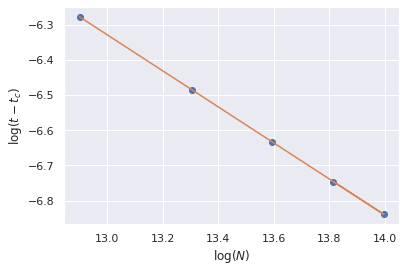

In [41]:
log_data = np.log(intersection_x)
plt.plot(log_data[:,0], log_data[:,1], 'o')
regress = stats.linregress(log_data[:,0], log_data[:,1])
y = regress[0]*log_data[:,0] + regress[1]
plt.plot(log_data[:,0], y)
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(t-t_c)$")
print(regress)

In [35]:
one_by_nu

0.48370727776857136

In [21]:
one_by_nu = abs(regress[0])

In [22]:
tc = 0.9845506554594833

(-10, 10)

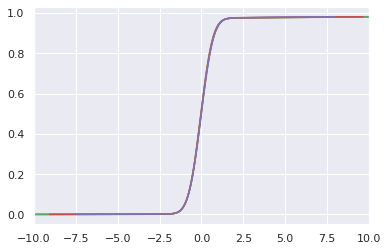

In [23]:
#     fig = plt.figure(figsize=(5,5), dpi=300)
for N in data.keys():
    t, H, P = data[N].T
    t_prime = (t-tc)*N**(one_by_nu)
    y = P

    plt.plot(t_prime, y, label='N={}'.format(N))

    pass

plt.xlim([-10,10])
# plt.ylim([0, 0.5])

selected point  (2.2997896060259553, 0.97650424)
selected point  (2.2999112678376554, 0.9763036465)
selected point  (2.299580347970583, 0.9767590651)
selected point  (2.2995747496423604, 0.9771039223)
selected point  (2.2985616746124493, 0.9776256552)
x=  2.3  beta/nu= -0.001232344143001734  stderr= 2.249171314256015e-05


(0, 1.3)

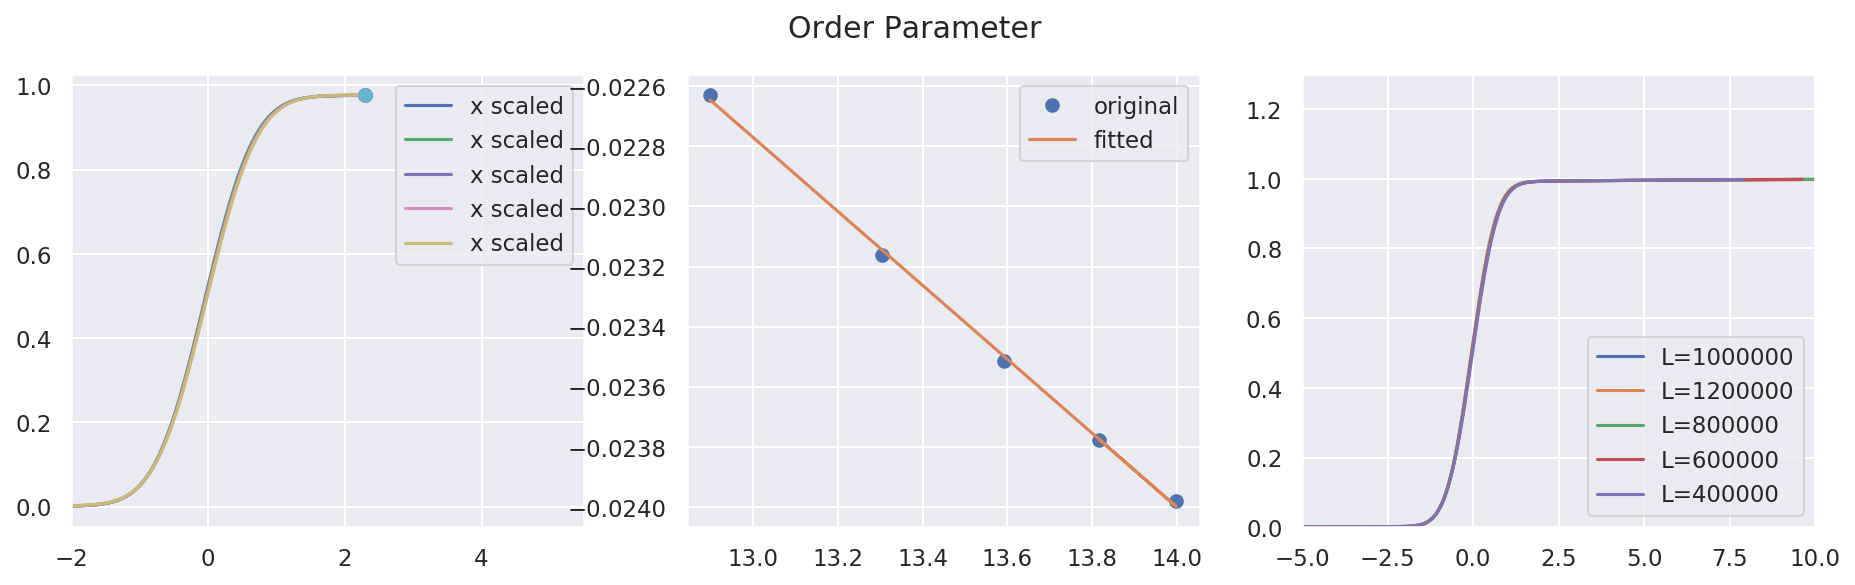

In [32]:
x_dist = 2.3

fig, ax = plt.subplots(1, 3, figsize=(15, 4), dpi=150)
length_height=[]
for N in data.keys():
    t, H, P = data[N].T
    y = P
    x = (t-tc)*N**(one_by_nu)
    index = x < x_dist
    y = P
    ax[0].plot(x[index], y[index], label="x scaled".format(N))
    selected = (x[index][-1], y[index][-1])
    print("selected point ", selected)
    ax[0].plot(selected[0], selected[1], 'o')
    length_height.append([])
    length_height[-1].append(N)
    length_height[-1].append(selected[1])
    pass

length_height = np.log(length_height)
ax[1].plot(length_height[:,0], length_height[:,1], 'o', label='original')

regress = stats.linregress(length_height[:,0], length_height[:,1])
exponent_beta = regress[0]
error = regress[-1]
print("x= ", x_dist, " beta/nu=", exponent_beta, " stderr=", error)

ax[1].plot(length_height[:,0], length_height[:,0]*regress[0]+regress[1], label='fitted')
# ax[1].text(2,2, "x={}, beta={:.4f}, error={:.4f}".format(x_dist, exponent_beta, error))



for N in data.keys():
    t, H, P = data[N].T

    x = (t-tc)*N**(one_by_nu)
    y = P
    
    index = np.linspace(0, x.shape[0]-5, 1000, dtype=int)
    y = P*N**(-regress[0])
    ax[2].plot(x[index], y[index], label="L={}".format(N))
    
    pass


# plt.legend()
fig.suptitle("Order Parameter")
ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_xlim([-2, 5.5])
# ax[1].set_xlim([-5, 5])
ax[2].set_xlim([-5, 10])

ax[2].set_ylim([0, 1.3])

In [28]:
0.0010973409840844652

0.0010973409840844652

In [ ]:
0.001232344143001734

### Data Collapse

In [36]:
# tc=0.9712994685782114
beta_by_nu= 0.0010973409840844652
one_by_nu = 0.5037072777685714

(11999, 3)
(17999, 3)
(23999, 3)
(29999, 3)
(35999, 3)


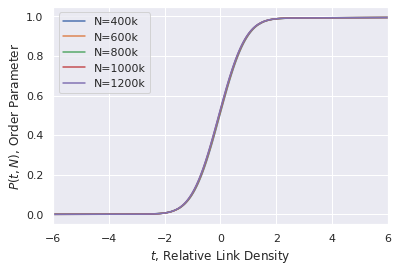

In [37]:
Ns = list(data.keys())
# beta_by_nu += 0.005
# beta_by_nu=0.06224871531346351

Ns.sort()
for N in Ns:
    print(data[N].shape)
    t, H, P = data[N].T
    x = (t-tc)*N**(one_by_nu)
    y = P*N**(beta_by_nu)
    plt.plot(x, y, label='N={}k'.format(N//1000))
    pass
plt.legend()
plt.xlabel(r"$t$, Relative Link Density")
plt.ylabel(r"$P(t, N)$, Order Parameter")

plt.xlim([-6, 6])
# plt.ylim([0, 0.5])
filename=fig_root + classname + "order-parameter_collapse_m{}_M{}".format(m, M)
# plt.savefig(filename)

In [34]:
beta_by_nu

0.05524871531346352

In [40]:
beta_by_nu

0.06024871531346353

In [43]:
beta_by_nu

0.047248715313463516

In [47]:
beta_by_nu

0.06224871531346351